In [666]:
from pykat import finesse        
from pykat.commands import *    
import numpy as np               
import matplotlib.pyplot as plt  

base = finesse.kat()
base.verbose = False

################ core optics#######################
Mich = """
l laser1 5 0 n1 # laser with P = 5 W


#modulator
s modcav 1 n1 nmod1
mod eom 9099471 0.1 1 pm nmod1 nmod2
s s1 1 nmod2 n21



#power recycling
m1 PRMC 1 0 0 n21 n31
s s2 20 n31 n2


#main
bs bs1 0.5 0.5 45 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 1k n4 n8
s Ly 1k n3 n6
m1 ETMy 0.10 0 0 n6 n7
m1 ETMx 0.10 0 0 n8 n9



#detectors
pd pow_out n5   #output port
pd prmc n2      #power reflected by interferometer
pd army n3      #power in arms y
pd armx n4      #power in arms x

ad carrier 0 n2
ad upper 9099471 n2
ad lower -9099471 n2




"""

Text(0, 0.5, 'Output port [W]')

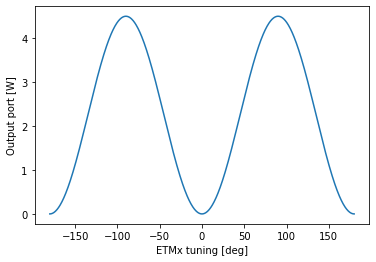

In [667]:
base.parse(Mich)
kat = base.deepcopy()
kat.parse(""" xaxis ETMx phi lin -180 180 800""")
out1=kat.run()
plt.plot(out1.x,out1['pow_out'],label="simple MI ")
plt.xlabel('ETMx tuning [deg]')
plt.ylabel('Output port [W]')